# Task 3: Closed Loop Control

We have already learned about the advantages of closed loop control - now we will implement it on the MBED microcontroller.

## Step 1: Understanding the Sensors

### Light Sensors

First we need to understand the sensors that our robot has. Execute the following code to see the output from the light sensors on the robot and observe how the numbers change when you move the robot over the line. Use the stop button to stop the code when you are finished.

In [ ]:
from sailorsbot import SBot
import sys
from time import sleep

In [ ]:
with SBot(18) as car:
    while True:
        sens = car.get_sensors()
        sys.stdout.write('\r'+str(sens))
        sleep(0.2)

### Line Position

It would be difficult to write a feedback control law based on those five light sensor numbers. Fortunately, the robot combines those measurements into a single measurement that indicates the position of the black line under the robot. To see the line position reading, run the following code. Use the stop button to stop the code when you are finished.

In [ ]:
with SBot(18) as car:
    while True:
        sens = car.get_line_position()
        sys.stdout.write('\r'+str(sens))
        sleep(0.2)

## Step 2: Programming a Control Law

Now we will use the line position as a feedback measurement for a control law. First, we will experiment in a simple simulator, then try it on the car.

In [2]:
from sailorssim import simulate

In the simulator, the `control` function is called at 20 Hz, just like `line_follow_loop()` on the MBED. The control function should set `leftspeed` and `rightspeed` based on the line position feedback. There are three arguments to the function:

- `line_position`: the most recent available position of the line
- `previous_position`: the line position reading from the last time `control` was called

In [3]:
def control(line_position, previous_position):
    
    # change the lines below to change the control law
    leftspeed = 0.3
    rightspeed = 0.3
    
    return leftspeed, rightspeed

Run the simulator with your control law. After a few tries, if you have programmed your control law wisely, the blue line will go towards the black line and stay with it.

The simulator is fairly accurate - if something works in the simulator, it is fairly likely to work on the robot, but it is not perfect, so it is best to also experiment on the robot.

Beware of things that make control harder, like sensor lag. You can change the simulated sensor lag with the `sensor_lag` keyword argument. In real life it seems to be about 0.045 seconds.

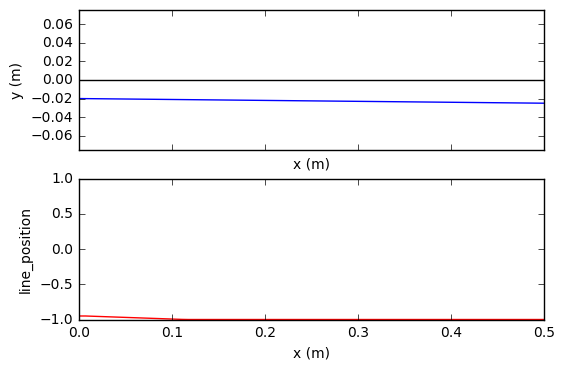

In [6]:
simulate(control, output='plot') # faster: output='plot'

## Step 3: Putting the Control Law on the MBED

Once you have a control law that you want to test on the robot. Copy your code from the `control` function above into main.cpp starting on line 24, then convert it from python to C.

There are three changes that you will probably have to make:

1. End every statement with a semicolon (;).
2. New variables must be declared with a type. If the variable is an integer, it should be type `int`; if it is a decimal number, it should be type `double` (for "double precision floating point number"), and if it is true/false, it should be type `bool`. Example:
    ```c++
    double sum = 0.3 + line_position;
    ```
3. If statements look like this
    ```c++
    if(line_position > 0.5) {
        leftspeed = 1.0;
    }
    ```
    instead of this
    ```python
        if line_position > 0.5:
            leftspeed = 1.0
    ```
    
Once you are ready, compile the code, put it on the mbed, and run this code to test it.

In [ ]:
from sailorsbot import SBot

with Sbot(<YOUR_NUMBER>) as car:
    print("Entering LINE_FOLLOW_MODE")
    car.set_mode(1)
    car.wait_for_manual()
    print("Left the line.")

...


## Additional notes (not required):

If you would like to tune values through python without having to reprogram the MBED with every change, there are four variables available to you in main.cpp.

- The C global variable `speed` on the MBED can be set remotely with the python command `car.set_pid_speed(speed)`.
- The C global variables `k_p`, `k_i`, and `k_d` on the MBED can be set remotely with the python command `car.set_gains(k_p, k_i, k_d)`.


## Bonus challenge (not required):

Write a control law that gives satisfactory results on cars with bad wheels. The same control law should work well on all three of these simulations and have low error at the end:

In [ ]:
simulate(control, output='plot', left_wheel_bias=0.2)

In [ ]:
simulate(control, output='plot', left_wheel_bias=0.0)

In [ ]:
simulate(control, output='plot', left_wheel_bias=-0.4)